In [58]:
import pandas as pd

In [59]:
df = pd.read_csv("interval.csv")

In [60]:
df.tail()

,date,time,latitude,longitude,elevation,heart_rate,cadence
578,2018-6-6,15:29:59,50.883497,4.716255,47.000000,149,71
579,2018-6-6,15:30:7,50.883423,4.716526,47.000000,149,72
580,2018-6-6,15:30:8,50.883435,4.716553,47.200001,149,71
581,2018-6-6,15:30:10,50.883416,4.716564,47.400002,149,70
582,2018-6-6,15:30:15,50.883310,4.716554,47.599998,0,71


In [61]:
for index, row in df.iterrows():
    times_list = str(row['time']).split(":")
    hours = int(times_list[0])
    minutes = int(times_list[1])
    seconds = int(times_list[2])
    
    total_time = (hours * 3600) + (minutes * 60) + seconds
    df.loc[index, 'total_seconds'] = total_time

In [62]:
df.head()

,date,time,latitude,longitude,elevation,heart_rate,cadence,total_seconds
0,2018-6-6,14:38:13,50.882886,4.717182,48.400002,78,48,52693.0
1,2018-6-6,14:38:15,50.882886,4.717150,48.200001,81,65,52695.0
2,2018-6-6,14:38:16,50.882897,4.717140,48.200001,87,73,52696.0
3,2018-6-6,14:38:17,50.882925,4.717125,48.200001,91,73,52697.0
4,2018-6-6,14:38:18,50.882950,4.717110,48.000000,95,73,52698.0


In [63]:
df['prev_total_seconds'] = df['total_seconds'].shift(1)
df['prev_lat'] = df['latitude'].shift(1)
df['prev_lon'] = df['longitude'].shift(1)

In [64]:
df = df.iloc[1:]

In [65]:
for index, row in df.iterrows():
    time_difference = row['total_seconds'] - row['prev_total_seconds']
    df.loc[index, 'time_difference'] = time_difference

In [66]:
df.head()

,date,time,latitude,longitude,elevation,heart_rate,cadence,total_seconds,prev_total_seconds,prev_lat,prev_lon,time_difference
1,2018-6-6,14:38:15,50.882886,4.717150,48.200001,81,65,52695.0,52693.0,50.882886,4.717182,2.0
2,2018-6-6,14:38:16,50.882897,4.717140,48.200001,87,73,52696.0,52695.0,50.882886,4.717150,1.0
3,2018-6-6,14:38:17,50.882925,4.717125,48.200001,91,73,52697.0,52696.0,50.882897,4.717140,1.0
4,2018-6-6,14:38:18,50.882950,4.717110,48.000000,95,73,52698.0,52697.0,50.882925,4.717125,1.0
5,2018-6-6,14:38:19,50.882977,4.717103,48.000000,98,73,52699.0,52698.0,50.882950,4.717110,1.0


In [67]:
from haversine import haversine

In [69]:
for index, row in df.iterrows():
    current_loc = (float(row['latitude']), float(row['longitude']))
    prev_loc = (float(row['prev_lat']), float(row['prev_lon']))
    
    distance = haversine(prev_loc, current_loc, miles=False)
    df.loc[index, 'distance'] = distance
    

In [70]:
df.head()

,date,time,latitude,longitude,elevation,heart_rate,cadence,total_seconds,prev_total_seconds,prev_lat,prev_lon,time_difference,distance
1,2018-6-6,14:38:15,50.882886,4.717150,48.200001,81,65,52695.0,52693.0,50.882886,4.717182,2.0,0.002294
2,2018-6-6,14:38:16,50.882897,4.717140,48.200001,87,73,52696.0,52695.0,50.882886,4.717150,1.0,0.001350
3,2018-6-6,14:38:17,50.882925,4.717125,48.200001,91,73,52697.0,52696.0,50.882897,4.717140,1.0,0.003323
4,2018-6-6,14:38:18,50.882950,4.717110,48.000000,95,73,52698.0,52697.0,50.882925,4.717125,1.0,0.003006
5,2018-6-6,14:38:19,50.882977,4.717103,48.000000,98,73,52699.0,52698.0,50.882950,4.717110,1.0,0.002983


In [71]:
for index, row in df.iterrows():
    pace = float(row['distance']) / float(row['time_difference'])
    df.loc[index, 'pace'] = pace

In [72]:
df.head()

,date,time,latitude,longitude,elevation,heart_rate,cadence,total_seconds,prev_total_seconds,prev_lat,prev_lon,time_difference,distance,pace
1,2018-6-6,14:38:15,50.882886,4.717150,48.200001,81,65,52695.0,52693.0,50.882886,4.717182,2.0,0.002294,0.001147
2,2018-6-6,14:38:16,50.882897,4.717140,48.200001,87,73,52696.0,52695.0,50.882886,4.717150,1.0,0.001350,0.001350
3,2018-6-6,14:38:17,50.882925,4.717125,48.200001,91,73,52697.0,52696.0,50.882897,4.717140,1.0,0.003323,0.003323
4,2018-6-6,14:38:18,50.882950,4.717110,48.000000,95,73,52698.0,52697.0,50.882925,4.717125,1.0,0.003006,0.003006
5,2018-6-6,14:38:19,50.882977,4.717103,48.000000,98,73,52699.0,52698.0,50.882950,4.717110,1.0,0.002983,0.002983


In [75]:
df['pace'] = df['pace'] * 1000

In [76]:
df.head()

,date,time,latitude,longitude,elevation,heart_rate,cadence,total_seconds,prev_total_seconds,prev_lat,prev_lon,time_difference,distance,pace
1,2018-6-6,14:38:15,50.882886,4.717150,48.200001,81,65,52695.0,52693.0,50.882886,4.717182,2.0,0.002294,1.146794
2,2018-6-6,14:38:16,50.882897,4.717140,48.200001,87,73,52696.0,52695.0,50.882886,4.717150,1.0,0.001350,1.350024
3,2018-6-6,14:38:17,50.882925,4.717125,48.200001,91,73,52697.0,52696.0,50.882897,4.717140,1.0,0.003323,3.323302
4,2018-6-6,14:38:18,50.882950,4.717110,48.000000,95,73,52698.0,52697.0,50.882925,4.717125,1.0,0.003006,3.005677
5,2018-6-6,14:38:19,50.882977,4.717103,48.000000,98,73,52699.0,52698.0,50.882950,4.717110,1.0,0.002983,2.982531


In [77]:
import matplotlib.pyplot as plt

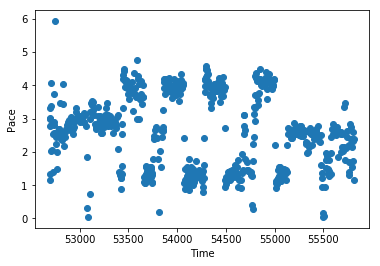

In [86]:
X = df['total_seconds']
y = df['pace']

plt.xlabel('Time')
plt.ylabel('Pace')

plt.scatter(X,y)
plt.show()

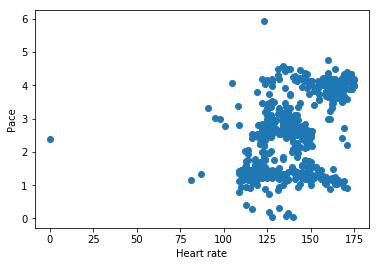

In [87]:
X = df['heart_rate']
y = df['pace']

plt.xlabel('Heart rate')
plt.ylabel('Pace')

plt.scatter(X,y)
plt.show()

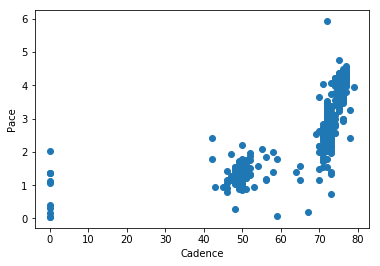

In [88]:
X = df['cadence']
y = df['pace']

plt.xlabel('Cadence')
plt.ylabel('Pace')

plt.scatter(X,y)
plt.show()

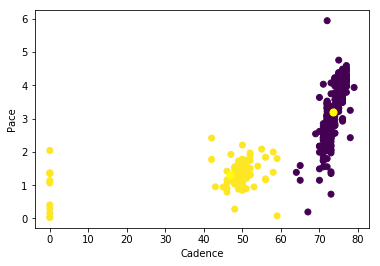

In [90]:
from sklearn.cluster import KMeans
import numpy as np

data = np.column_stack((X, y))
k_means = KMeans(n_clusters=2)
k_means.fit(data)  
plt.xlabel('Cadence')
plt.ylabel('Pace')
plt.scatter(data[:, 0], data[:, 1],c = k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 50, c = 'yellow')
plt.show()

In [95]:
# Returns 0 or 1
# 1 = Rest Period
# 0 = High intensity period
def make_prediction(cad, pace):
    return k_means.predict(np.column_stack((cad, pace)).reshape(1, -1))[0]

In [97]:
make_prediction(80, 5)

0